In [ ]:
# @title Importing dependencies

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# @title Getting CIFAR10 data

train_data = datasets.CIFAR10(root="data",
                              train=True,
                              download=True,
                              transform=ToTensor(),
                              target_transform=None)

test_data = datasets.CIFAR10(root="data",
                              train=False,
                              download=True,
                              transform=ToTensor(),
                              target_transform=None)

Files already downloaded and verified
Files already downloaded and verified


Length of train dataset: 50000
Length of test dataset: 10000
Shape of sample image: torch.Size([3, 32, 32])


Text(0.5, 1.0, 'horse')

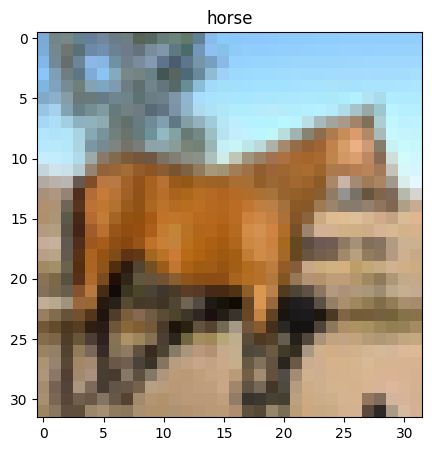

In [ ]:
# @title Visualising the data

import matplotlib.pyplot as plt

print(f"Length of train dataset: {len(train_data)}")
print(f"Length of test dataset: {len(test_data)}")
print(f"Shape of sample image: {train_data[0][0].shape}")

fig = plt.figure(figsize=(5, 5))
random_idx = torch.randint(0, len(train_data), size=[1]).item()
img, label = train_data[random_idx]
img = torch.permute(img, (1, 2, 0))
plt.imshow(img)
plt.title(train_data.classes[label])

In [ ]:
# @title Making a dataloader

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

print(f"Train dataloader: {len(train_loader)} batches of {BATCH_SIZE}.")
print(f"Test dataloader: {len(test_loader)} batches of {BATCH_SIZE}.")

Train dataloader: 1563 batches of 32.
Test dataloader: 313 batches of 32.


In [ ]:
# @title Defining a model

class cifarModel(nn.Module):
  def __init__(self, input_shape, output_shape):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.block2 = nn.Sequential(
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=640, out_features=2560),
        nn.ReLU(),
        nn.Linear(in_features=2560, out_features=320),
        nn.ReLU(),
        nn.Linear(in_features=320, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, X):
    X = self.block1(X)
    X = self.block2(X)
    X = self.classifier(X)
    return X

In [ ]:
# @title Setting up device-agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [ ]:
# @title Instantiating the model

torch.manual_seed(42)

model_0 = cifarModel(input_shape=32*32*3,
                    output_shape=len(train_data.classes))
model_0.to(device)

cifarModel(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=2560, bias=True)
    (2): ReLU()
    (3): Linear(in_features=2560, out_features=320, bias=True)
    (4): ReLU()
    (5): Linear(in_features=320, out_features=10, bias=True)
    (6): ReLU()
  )
)

In [ ]:
# @title Set up loss function and optimiser

loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# @title Practice getting items from dataloader

import matplotlib.pyplot as plt

for batch, (img, label) in enumerate(train_loader):
  print(batch, label)
  break
# print(img[0].shape)
# print(label[0].shape)
# fig = plt.figure(figsize=(5, 5))
# # random_idx = torch.randint(0, len(train_data), size=[1]).item()
# img, label = train_data[0]
# img = torch.permute(img, (1, 2, 0))
# plt.imshow(img)
# plt.title(train_data.classes[label])

0 tensor([9, 6, 3, 9, 1, 6, 6, 3, 8, 4, 3, 6, 7, 7, 8, 8, 8, 9, 3, 5, 3, 2, 9, 1,
        3, 7, 4, 6, 5, 4, 9, 4])


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 14.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
# @title Importing accuracy function from torchmetrics

from torchmetrics import Accuracy

accuracy = Accuracy(task="multiclass",
                    num_classes=10).to(device)

In [ ]:
model_0.eval()
with torch.inference_mode():
  for X_test, y_test in test_loader:
    X_test, y_test = X_test.to(device), y_test.to(device)
    y_pred = model_0(X_test)
    y_pred_classes = y_pred.argmax(dim=1)
    break
print(y_pred.shape)
print(y_test.shape)

torch.Size([32, 10])
torch.Size([32])


In [ ]:
# @title Training

torch.manual_seed(42)

epochs = 15

for epoch in range(epochs):
  train_accuracy = 0
  train_loss = 0

  ## Training
  for idx, (X, y) in enumerate(train_loader):
    X, y = X.to(device), y.to(device)
    # 0. Set to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    y_pred_classes = y_pred.argmax(dim=1)
    train_accuracy += accuracy(y_pred_classes, y)

    # 3. Zero grad
    optimiser.zero_grad()

    # 4. Backprop
    loss.backward()

    # 5. Update optimiser
    optimiser.step()

  train_loss /= len(train_loader)
  train_accuracy /= len(train_loader)

  ## Testing
  test_accuracy = 0
  test_loss = 0
  # 0. Set to testing mode
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_loader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      y_pred_test = model_0(X_test)

      # 2. Calculate loss and accuracy
      test_loss += loss_fn(y_pred_test, y_test)
      y_pred_test_classes = y_pred_test.argmax(dim=1)
      test_accuracy += accuracy(y_pred_test_classes, y_test)

    test_accuracy /= len(test_loader)
    test_loss /= len(test_loader)

  print("Epoch: {} | Train loss: {} | Train accuracy: {}% | Test loss: {} | Test accuracy: {}%".format(epoch, train_loss, train_accuracy*100, test_loss, test_accuracy*100))

Epoch: 0 | Train loss: 2.2516307830810547 | Train accuracy: 17.592370986938477% | Test loss: 2.1233463287353516 | Test accuracy: 26.956867218017578%
Epoch: 1 | Train loss: 1.9236781597137451 | Train accuracy: 32.32365417480469% | Test loss: 1.6055314540863037 | Test accuracy: 42.73162841796875%
Epoch: 2 | Train loss: 1.4286257028579712 | Train accuracy: 48.77239227294922% | Test loss: 1.3197145462036133 | Test accuracy: 52.336265563964844%
Epoch: 3 | Train loss: 1.2079259157180786 | Train accuracy: 56.92178726196289% | Test loss: 1.2894266843795776 | Test accuracy: 54.013580322265625%
Epoch: 4 | Train loss: 1.0256437063217163 | Train accuracy: 63.577659606933594% | Test loss: 1.1249674558639526 | Test accuracy: 60.49320602416992%
Epoch: 5 | Train loss: 0.8570820093154907 | Train accuracy: 69.59172821044922% | Test loss: 1.1752986907958984 | Test accuracy: 59.66453552246094%
Epoch: 6 | Train loss: 0.6945690512657166 | Train accuracy: 75.23392486572266% | Test loss: 1.287956953048706 | T

# Results
### **Model 1**:
```
cifarModel(
  (layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=30720, bias=True)
    (2): ReLU()
    (3): Linear(in_features=30720, out_features=10, bias=True)
    (4): ReLU()
  )
)
```
Trained for 15 epochs (273.1s) gives:
```
Train loss: 1.8271445035934448 | Train accuracy: 40.20913314819336% | Test loss: 1.9195170402526855 | Test accuracy: 37.380191802978516%
```

### **Model 2**:
```
cifarModel(
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=30720, bias=True)
    (2): ReLU()
    (3): Linear(in_features=30720, out_features=640, bias=True)
    (4): ReLU()
    (5): Linear(in_features=640, out_features=10, bias=True)
    (6): ReLU()
  )
)
```
Trained for 15 epochs (325.207s) gives:
```
Epoch: 14 | Train loss: 1.0224794149398804 | Train accuracy: 63.33173370361328% | Test loss: 1.576176404953003 | Test accuracy: 49.46086120605469%
```

### **Model 3**:
```
cifarModel(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)
```
Trained for 15 epochs (211.781s) gives:
```
Epoch: 14 | Train loss: 1.1179897785186768 | Train accuracy: 60.88851547241211% | Test loss: 1.13052237033844 | Test accuracy: 60.90255355834961%
```

### **Model 4**:
```
cifarModel(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=2560, bias=True)
    (2): ReLU()
    (3): Linear(in_features=2560, out_features=320, bias=True)
    (4): ReLU()
    (5): Linear(in_features=320, out_features=10, bias=True)
    (6): ReLU()
  )
)
```
Trained for 15 epochs (223.549) gives:
```
Epoch: 14 | Train loss: 0.22673390805721283 | Train accuracy: 92.65035247802734% | Test loss: 1.934193730354309 | Test accuracy: 59.23522186279297%
```